# Introdução a Python & Machine Learning

Este trabalho é da matéria __Programando IA com Python__ do curso __MBA em Artificial Intelligence & Machine Learning__ da FIAP.
Ao trabalhar com o dataset *lemonadade.csv*, visa a familiarização com esses principais conceitos:

* Numpy;
* Pandas;
* Análise Exploratória de dados;
* Regressão linear.

Para concluir a tarefa, os seguintes itens foram respondidos:

1) Leia o arquivo lemonades.csv usando pandas;  
2) retorne as informações sobre as colunas e as principais estatísticas sobre o dataset;  
3) Realize a limpeza do dataset:  

- verifique se existe valores nulos  
- remova duplicatas  
- trate os elementos faltantes (interpolação e media);  

4) Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja;  
5) Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço);  
6) Retorne o lucro total;  
7) escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima  
8) escreva uma função que receba dois parametros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach';  
9) escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank;  
10) Imprima um gráfico de linha que retorne o lucro ao longo do tempo
11) crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados?
12) crie um histograma que mostre o lucro (revenue) com 10 bins
13) crie um gráfico de linha que compute o lucro por tipo de fruta ao longo do tempo.
14) usando regressão linear, prediga vendas a partir de:

- temperature
- leafltes
- price
- retorne o gráfico com a reta ajustada aos dados para cada variável

15) Usando regressão linear, prediga vendas a partir das três variáveis juntas;
16) Usando a Regressão Linear implementada em sala como modelo, generalize o algoritmo para que ele possa ser usado para regressão multivariada;
17) Aplique o algoritmo implementado no conjunto de dados consumo cerveja usando as mesmas features para treinamento. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Lemonade2016.csv")

In [3]:
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Date           31 non-null object
Location       32 non-null object
Lemon          32 non-null int64
Orange         32 non-null int64
Temperature    32 non-null int64
Leaflets       31 non-null float64
Price          32 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.8+ KB


In [5]:
df.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


In [6]:
df.isnull().any()

Date            True
Location       False
Lemon          False
Orange         False
Temperature    False
Leaflets        True
Price          False
dtype: bool

In [7]:
df.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [8]:
df[df['Date'].isnull()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
8,NaN,Beach,123,86,82,113.0,0.25


In [9]:
df[6:11]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,7/6/2016,Beach,103,69,82,90.0,0.25
7,7/7/2016,Beach,143,101,81,135.0,0.25
8,NaN,Beach,123,86,82,113.0,0.25
9,7/9/2016,Beach,134,95,80,126.0,0.25
10,7/10/2016,Beach,140,98,82,131.0,0.25


In [10]:
df['Date'].fillna('7/8/2016', inplace = True)

In [11]:
df['Date'][8]

'7/8/2016'

In [12]:
df[df['Leaflets'].isnull()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
20,7/20/2016,Park,71,42,70,NaN,0.5


In [13]:
df[18:23]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
18,7/18/2016,Park,131,92,81,122.0,0.5
19,7/19/2016,Park,122,85,78,113.0,0.5
20,7/20/2016,Park,71,42,70,NaN,0.5
21,7/21/2016,Park,83,50,77,90.0,0.5
22,7/22/2016,Park,112,75,80,108.0,0.5


In [47]:
print("Média de folhetos para o Parque: %d" % df[df['Location'] == 'Park'].mean()['Leaflets'].round(decimals = 0))

Média de folhetos para o Parque: 109


In [15]:
df['Leaflets'].interpolate(inplace = True)

In [16]:
df['Leaflets'] = df['Leaflets'].round(decimals = 0)

In [17]:
df['Leaflets'][20]

102.0

In [18]:
df[df.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,7/6/2016,Beach,103,69,82,90.0,0.25


In [19]:
df.drop_duplicates(inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 31
Data columns (total 7 columns):
Date           31 non-null object
Location       31 non-null object
Lemon          31 non-null int64
Orange         31 non-null int64
Temperature    31 non-null int64
Leaflets       31 non-null float64
Price          31 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


In [21]:
df['Sales'] = df['Lemon'] + df['Orange']

In [22]:
df['Revenue'] = df['Sales'] * df['Price']

In [23]:
print("Lucro total = $%.2f" % df['Revenue'].sum())

Lucro total = $2138.00


In [24]:
def temp_analise(dataset,temp):
    '''
    Retorna o valor da temperatura (min/media/max) para o dataset de entrada
    Input:
        dataset = conjunto de dados
        temp    =  1 para temperatura máxima
                =  0 para temperatura média
                = -1 para temperatura mínima
    Output: temperatura em Fahrenheit
    '''    
    if temp == 1:
        return dataset['Temperature'].max()
    if temp == 0:
        return dataset['Temperature'].mean()
    if temp == -1:
        return dataset['Temperature'].min()
    

In [25]:
print('Temperatura máxima: %.1f' % temp_analise(df,1))
print('Temperatura média: %.1f' % temp_analise(df,0))
print('Temperatura mínima: %.1f' % temp_analise(df,-1))

Temperatura máxima: 84.0
Temperatura média: 78.9
Temperatura mínima: 70.0


In [26]:
def loc_reajpreco(dataset,localizacao):
    '''
    Reajusta o preço de acordo com a localidade
    Input:
        dataset        = conjunto de dados
        localizacao    =  'Park' ou 'Beach'
    Output: dataset com o preço reajustado
    '''
    new_dataset = DataFrame.copy(dataset)
    if localizacao == 'Park':
        new_dataset.loc[new_dataset['Location'] == 'Park', 'Price'] = (new_dataset['Price']* 1.15).round(decimals = 2)
        return new_dataset
    if localizacao == 'Beach':
        new_dataset.loc[new_dataset['Location'] == 'Beach', 'Price'] = (new_dataset['Price']* 1.10).round(decimals = 2)
        return new_dataset

In [27]:
DataFrame.head(loc_reajpreco(df, 'Park'))

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,7/1/2016,Park,97,67,70,90.0,0.29,164,41.00
1,7/2/2016,Park,98,67,72,90.0,0.29,165,41.25
2,7/3/2016,Park,110,77,71,104.0,0.29,187,46.75
3,7/4/2016,Beach,134,99,76,98.0,0.25,233,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.25,277,69.25


In [28]:
DataFrame.head(loc_reajpreco(df, 'Beach'))

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,7/1/2016,Park,97,67,70,90.0,0.25,164,41.00
1,7/2/2016,Park,98,67,72,90.0,0.25,165,41.25
2,7/3/2016,Park,110,77,71,104.0,0.25,187,46.75
3,7/4/2016,Beach,134,99,76,98.0,0.28,233,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.28,277,69.25


In [29]:
def temp_rank(dataset):
    '''
    Ordena o dataset por ordem descrecente da temperatura e cria o rank TempRank
    Input:
        dataset = conjunto de dados
    Output: dataset ordenado com a nova coluna TempRank
    '''
    dataset_temp = DataFrame.copy(dataset.sort_values('Temperature', ascending=False))
    dataset_temp['TempRank'] = range(1,len(dataset_temp)+1)
    return dataset_temp

In [30]:
DataFrame.head(temp_rank(df))

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,TempRank
25,7/25/2016,Park,156,113,84,135.0,0.50,269,134.50,1
12,7/12/2016,Beach,130,95,84,99.0,0.25,225,56.25,2
26,7/26/2016,Park,176,129,83,158.0,0.35,305,106.75,3
11,7/11/2016,Beach,162,120,83,135.0,0.25,282,70.50,4
10,7/10/2016,Beach,140,98,82,131.0,0.25,238,59.50,5


In [31]:
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
df['Day'] = df['Date'].apply(lambda x: x.day)

In [33]:
DataFrame.head(df)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,Day
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00,1
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25,2
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75,3
3,2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25,4
4,2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25,5


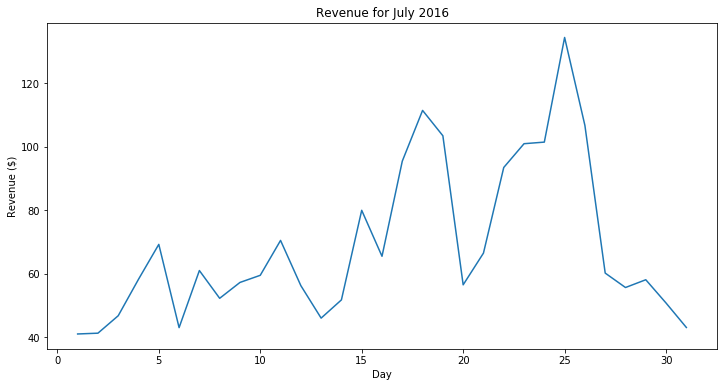

In [34]:
fig, axes = plt.subplots(figsize = (12,6))
renevenue_graph = sns.lineplot(x = 'Day', y = 'Revenue', data = df)
renevenue_graph.set_title('Revenue for July 2016')
renevenue_graph.set_ylabel('Revenue ($)');

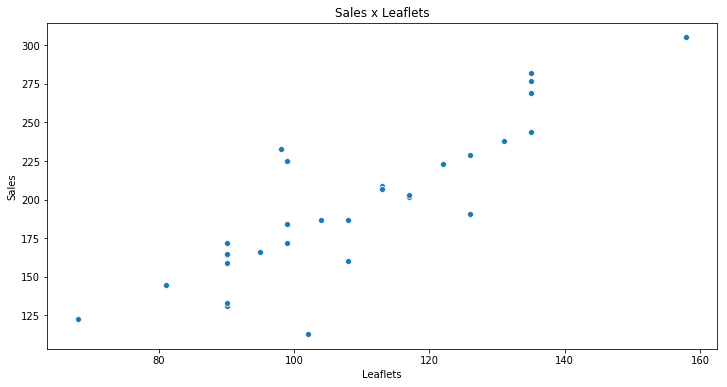

In [35]:
fig, axes = plt.subplots(figsize = (12,6))
salesLeaflets_graph = sns.scatterplot(x="Leaflets", y="Sales", data=df)
salesLeaflets_graph.set_title('Sales x Leaflets');

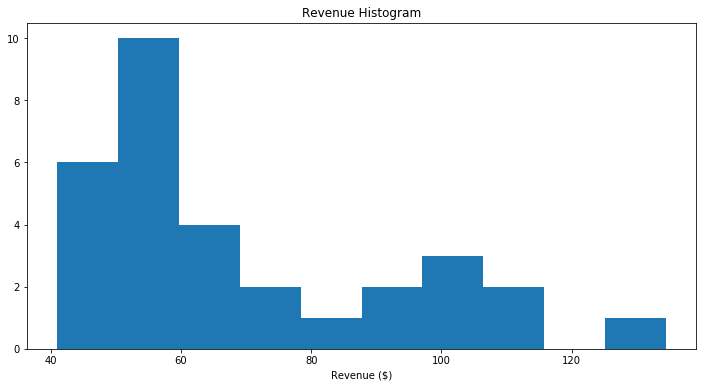

In [36]:
fig, axes = plt.subplots(figsize = (12,6))
revenueHist_graph = plt.hist(df['Revenue'], bins = 10)
plt.xlabel('Revenue ($)')
plt.title('Revenue Histogram');

In [37]:
# Exercicio 14
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]

In [38]:
from sklearn import linear_model

# Temperature
regr_temp = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Temperature']])
train_y = np.asanyarray(train[['Sales']])
regr_temp.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_temp.coef_)
print ('Intercept: ',regr_temp.intercept_)

Coefficients:  [[5.78524295]]
Intercept:  [-260.03389322]


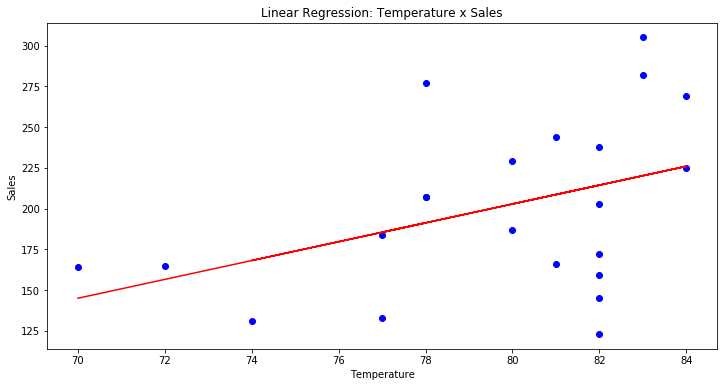

In [39]:
# Plot outputs
fig, axes = plt.subplots(figsize = (12,6))
lr_tempGraph = plt.scatter(train['Temperature'], train['Sales'],  color='blue')
plt.plot(train_x, regr_temp.coef_[0][0]*train_x + regr_temp.intercept_[0], '-r')
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title('Linear Regression: Temperature x Sales');

In [40]:
# Leaflets
regr_leaflets = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Leaflets']])
train_y = np.asanyarray(train[['Sales']])
regr_leaflets.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_leaflets.coef_)
print ('Intercept: ',regr_leaflets.intercept_)

Coefficients:  [[2.17985154]]
Intercept:  [-35.93115762]


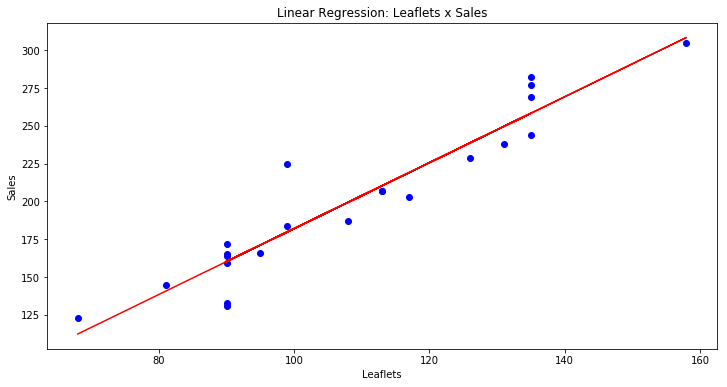

In [41]:
# Plot outputs
fig, axes = plt.subplots(figsize = (12,6))
lr_leafGraph = plt.scatter(train['Leaflets'], train['Sales'],  color='blue')
plt.plot(train_x, regr_leaflets.coef_[0][0]*train_x + regr_leaflets.intercept_[0], '-r')
plt.xlabel("Leaflets")
plt.ylabel("Sales")
plt.title('Linear Regression: Leaflets x Sales');

In [42]:
# Price
regr_price = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Price']])
train_y = np.asanyarray(train[['Sales']])
regr_price.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_price.coef_)
print ('Intercept: ',regr_price.intercept_)

Coefficients:  [[-119.51401869]]
Intercept:  [241.42523364]


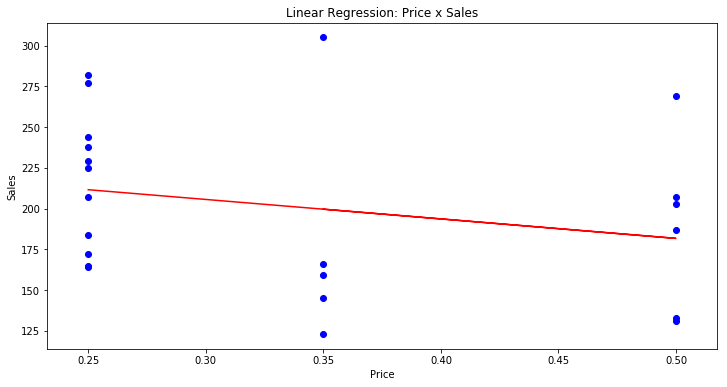

In [43]:
# Plot outputs
fig, axes = plt.subplots(figsize = (12,6))
lr_priceGraph = plt.scatter(train['Price'], train['Sales'],  color='blue')
plt.plot(train_x, regr_price.coef_[0][0]*train_x + regr_price.intercept_[0], '-r')
plt.xlabel("Price")
plt.ylabel("Sales")
plt.title('Linear Regression: Price x Sales');

In [44]:
# Exercicio 14
regr_mult = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Temperature', 'Leaflets','Price']])
train_y = np.asanyarray(train[['Sales']])
regr_mult.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr_mult.coef_)
print ('Intercept: ',regr_mult.intercept_)

Coefficients:  [[  1.74206476   2.04650281 -83.87733523]]
Intercept:  [-131.59391602]


In [45]:
# Predição
y_hat= regr_mult.predict(test[['Temperature','Leaflets','Price']])
x = np.asanyarray(test[['Temperature','Leaflets','Price']])
y = np.asanyarray(test[['Sales']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_mult.score(x, y))

Residual sum of squares: 678.56
Variance score: 0.42
